# Reading an Image

In [1]:
import cv2
import numpy as np

ImportError: No module named 'cv2'

In [ ]:
img = cv2.imread('watch.jpg',cv2.IMREAD_COLOR)

In [ ]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Splitting Image Attributes

In [ ]:
b,g,r = cv2.split(img)

# Writing image to a file

In [ ]:
cv2.imwrite("image_processed.jpg", img)

# Representing the image in hsv

In [ ]:
img = cv2.imread('kid.jpg') 
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

In [ ]:
#v+=50
final_hsv = cv2.merge((h, s, v))
img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

In [ ]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Drawing on an Image

In [ ]:
import numpy as np
import cv2

img = cv2.imread('watch.jpg',cv2.IMREAD_COLOR)

In [ ]:
cv2.line(img,(0,0),(200,300),(255,255,255),50)
#cv2.rectangle(img,(500,250),(1000,500),(0,0,255),15)
#cv2.circle(img,(447,63), 63, (0,255,0), -1)

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV!',(100,100), font, 2, (200,255,155), 13, cv2.LINE_AA)

In [ ]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Operations

In [ ]:
import cv2
import numpy as np

img = cv2.imread('watch.jpg',cv2.IMREAD_COLOR)

In [ ]:
px = img[55,55]
print(px)

In [ ]:
img[55,55] = [255,255,255]

In [ ]:
px = img[100:150,100:150]
print(px)

In [ ]:
img[100:150,100:150] = [255,255,255]

In [ ]:
print(img.shape)
print(img.size)
print(img.dtype)

In [ ]:
#watch_face = img[37:111,107:194]
#img[0:74,0:87] = watch_face

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Arithmetics

In [ ]:
import cv2
import numpy as np

# 500 x 250
img1 = cv2.imread('3D-Matplotlib.png')
img2 = cv2.imread('mainsvmimage.png')

add = img1+img2

cv2.imshow('add',add)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

img1 = cv2.imread('3D-Matplotlib.png')
img2 = cv2.imread('mainsvmimage.png')

weighted = cv2.addWeighted(img1, 0.6, img2, 0.4, 0)
cv2.imshow('weighted',weighted)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Linear Mapping

In [ ]:
import cv2
import numpy as np

In [ ]:
def norm(x):
    if(x>255):
        return 255
    elif(x<0):
        return 0
    else:
        return x

In [ ]:
def brighten(y,b):
    y[0]=norm(y[0]+b)
    y[1]=norm(y[1]+b)
    y[2]=norm(y[2]+b)
    return y

In [ ]:
def gain(y,g):
    y[0]=norm(y[0]*g)
    y[1]=norm(y[1]*g)
    y[2]=norm(y[2]*g)
    return y

In [ ]:
def thresh(x,th):
    if(x>th):
        return 255
    elif(x<th):
        return 0
    else:
        return x

In [ ]:
def threshold(y,th):
    y[0]=thresh(y[0],th)
    y[1]=thresh(y[1],th)
    y[2]=thresh(y[2],th)
    return y   

In [ ]:
def neg(x):
    return (255-x)

In [ ]:
def negative(y):
    y[0]= neg(y[0])
    y[1]= neg(y[1])
    y[2]= neg(y[2])
    return y

In [ ]:
img = cv2.imread('kid.jpg')

img2 = []

for x in img:
    for y in x:
        p = brighten(y,50)
        #p = gain(y,1.5)
        #p = threshold(y,100)
        #p = negative(y)
        img2.append(y)

img2 = np.asarray(img2)
img2.shape = img.shape
cv2.imshow('image',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Thresholding

## Thresholding on Colored Image

In [ ]:
import cv2
import numpy as np

In [ ]:
img = cv2.imread('bookpage.jpg')
retval, threshold = cv2.threshold(img, 12, 255, cv2.THRESH_BINARY)

In [ ]:
cv2.imshow('original',img)
cv2.imshow('threshold',threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Thresholding on Grayscale Image

In [ ]:
import cv2
import numpy as np

grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
retval, threshold = cv2.threshold(grayscaled, 10, 255, cv2.THRESH_BINARY)
cv2.imshow('original',img)
cv2.imshow('threshold',threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Adaptive Thresholding

In [ ]:
import cv2
import numpy as np

th = cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)
cv2.imshow('original',img)
cv2.imshow('Adaptive threshold',th)
cv2.waitKey(0)
cv2.destroyAllWindows()

Reference:  https://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html

## Geometric Transformation

# Scaling

In [ ]:
import cv2
import numpy as np

img = cv2.imread('messi5.jpg')
 
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
 
#OR

height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Translation

In [ ]:
import cv2
import numpy as np
 
img = cv2.imread('messi5.jpg',0)
rows,cols = img.shape
 
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))
 
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Rotation

In [ ]:
img = cv2.imread('messi5.jpg',0)
rows,cols = img.shape
 
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Affine Transformation

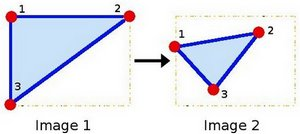

In [ ]:
img = cv2.imread('sudoku.jpg')
rows,cols,ch = img.shape
 
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
 
M = cv2.getAffineTransform(pts1,pts2)
 
dst = cv2.warpAffine(img,M,(cols,rows))
 
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## Perspective Transformation

In [ ]:
img = cv2.imread('sudoku.jpg')
rows,cols,ch = img.shape
 
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
 
M = cv2.getPerspectiveTransform(pts1,pts2)
 
dst = cv2.warpPerspective(img,M,(300,300))
 
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# 2D Convolution (Image Filtering)

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('wolf.png')

kernel = np.ones((5,5),np.float32)/25
print(kernel)
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

res = np.hstack((img,dst)) #stacking images side-by-side
cv2.imshow('image',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('wolf.png')
#img = cv2.imread('noisy.png')

Blur = cv2.blur(img,(5,5))
Gaussian = cv2.GaussianBlur(img,(5,5),0)
Median = cv2.medianBlur(img,5)
Bilateral = cv2.bilateralFilter(img,9,75,75)


plt.subplot(221),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(Gaussian),plt.title('Gaussian Blur')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(Median),plt.title('Median Blur')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(Bilateral),plt.title('Bilateral Filter')
plt.xticks([]), plt.yticks([])

plt.show()

res = np.hstack((img,Gaussian,Median,Bilateral)) #stacking images side-by-side
cv2.imshow('image',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
img = cv2.imread('kid.jpg',cv2.IMREAD_COLOR)


blur = cv2.GaussianBlur(img,(15,15),0)
median = cv2.medianBlur(img,15)
bilateral = cv2.bilateralFilter(img,15,75,75)


cv2.imshow('image',bilateral)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Morphological Transformation

## Erosion, Dilation, Opening and Closing

In [ ]:
import cv2
import numpy as np

img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)

erosion = cv2.erode(img,kernel,iterations = 1)
dilation = cv2.dilate(img,kernel,iterations = 1)


opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

cv2.imshow('image',erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Gradients:

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('messi5.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
 
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

cv2.imshow('image',img)
#cv2.imshow('image',laplacian)
#cv2.imshow('image',sobelx)
#cv2.imshow('image',sobely)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Canny Edge Detection

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg',0)
edges = cv2.Canny(img,100,200)
 
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

cv2.imshow('image',edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Histograms

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('histogram.png',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

In [ ]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('watch.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

## Histogram Equalization

In [ ]:
def histogram_equalize(img):
    b, g, r = cv2.split(img)
    red = cv2.equalizeHist(r)
    green = cv2.equalizeHist(g)
    blue = cv2.equalizeHist(b)
    return cv2.merge((blue, green, red))

In [ ]:
img = cv2.imread('histogram.png')
equ = histogram_equalize(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

cv2.imshow('image',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

### CLAHE(Contrast Limited Adaptive Histogram Equalization)

In [ ]:
def histogram_clahe(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    b, g, r = cv2.split(img)
    red = clahe.apply(r)
    green = clahe.apply(g)
    blue = clahe.apply(b)
    return cv2.merge((blue, green, red))

In [ ]:
img = cv2.imread('histogram.png')
equ = histogram_clahe(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

cv2.imshow('image',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Template Matching

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg',0)
img2 = img.copy()
template = cv2.imread('template.jpg',0)
w, h = template.shape[::-1]
 
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
 
for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
 
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()
    cv2.imshow('image',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## Template Matching with multiple Objects

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('mario.png')
img = cv2.imread('mario.png')

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('mario_coin.png',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv2.imwrite('res.png',img_rgb)


res = np.hstack((img,img_rgb))
cv2.imshow('image',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Object Detection

In [ ]:
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

img = cv2.imread('HaarTest.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

 https://docs.opencv.org/3.1.0/d6/d00/tutorial_py_root.html

https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html